# World_Countries_Analysis

In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

In [38]:
World_countries = pd.read_csv('/Users/tuzil/Desktop/All Projects/countries of the world/countries of the world.csv', decimal=',')

In [39]:
World_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [40]:
World_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [41]:
World_countries.isnull().sum().sort_values(ascending = False)

Climate                               22
Literacy (%)                          18
Industry                              16
Service                               15
Agriculture                           15
Deathrate                              4
Phones (per 1000)                      4
Infant mortality (per 1000 births)     3
Net migration                          3
Birthrate                              3
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
GDP ($ per capita)                     1
Region                                 0
Coastline (coast/area ratio)           0
Pop. Density (per sq. mi.)             0
Area (sq. mi.)                         0
Population                             0
Country                                0
dtype: int64

In [42]:
World_countries.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [43]:
World_countries.sample(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
178,Sao Tome & Principe,SUB-SAHARAN AFRICA,193413,1001,193.2,20.88,-2.72,43.11,1200.0,79.3,36.2,6.25,48.96,44.79,2.0,40.25,6.47,0.167,0.148,0.684
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
173,Saint Lucia,LATIN AMER. & CARIB,168458,616,273.5,25.65,-2.67,13.53,5400.0,67.0,303.3,6.56,22.95,70.49,2.0,19.68,5.08,0.070,0.200,0.730
189,South Africa,SUB-SAHARAN AFRICA,44187637,1219912,36.2,0.23,-0.29,61.81,10700.0,86.4,107.0,12.08,0.79,87.13,1.0,18.20,22.00,0.025,0.303,0.671
98,Ireland,WESTERN EUROPE,4062235,70280,57.8,2.06,4.99,5.39,29600.0,98.0,500.5,15.20,0.03,84.77,3.0,14.45,7.82,0.050,0.460,0.490


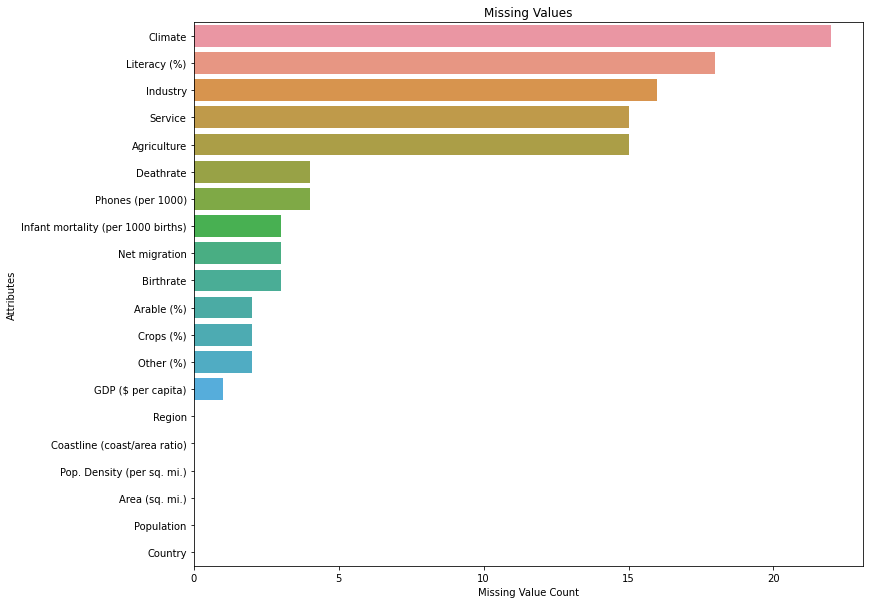

In [44]:
plt.figure(figsize=(12,10))
sns.barplot(data=World_countries.isnull().sum().sort_values(ascending = False).reset_index(), y='index',x=0)
plt.ylabel('Attributes')
plt.title('Missing Values')
plt.xlabel('Missing Value Count')
plt.show()

In [45]:
# Check counts of all Countries in the world

World_countries.Country.value_counts()

New Caledonia     1
Cape Verde        1
Mauritius         1
Vietnam           1
Belgium           1
                 ..
Philippines       1
Grenada           1
Honduras          1
Lithuania         1
Martinique        1
Name: Country, Length: 227, dtype: int64

In [46]:
# Check counts of all Regions in the world

World_countries.Region.value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
WESTERN EUROPE                         28
ASIA (EX. NEAR EAST)                   28
OCEANIA                                21
NEAR EAST                              16
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

In [47]:
# Check the Country names are duplicates

World_countries[World_countries.Country.duplicated()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [48]:
# Calculate the 'Total_GDP_of_Per_Country' value

def Total_GDP_of_Per_Country(World_countries):
    World_countries['Total_GDP_of_Per_Country'] = World_countries.apply(lambda x: x['GDP ($ per capita)'] * x['Population'], axis=1)  
    return World_countries

In [49]:
World_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [50]:
# Apply null value to mode or median

pd.set_option('mode.chained_assignment', None)
for all_columns in World_countries.columns.values:
    if World_countries[all_columns].isnull().sum() == 0:
        continue
    if all_columns == 'Climate':
        apply_values = World_countries.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        apply_values = World_countries.groupby('Region')[all_columns].median()
            
    for all_region in World_countries['Region'].unique():
        World_countries[all_columns].loc[(World_countries[all_columns].isnull())&(World_countries['Region']==all_region)] = apply_values[all_region]


In [51]:
World_countries.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [52]:
World_countries.to_csv('C:/Users/tuzil/Desktop/All Projects/countries of the world/World_countries_cleanning.csv')

Other Visualizations were displayed with Tableau. See additional file.